# Geospatial Analysis

In [1]:
import sys
import os
data_folder = os.path.join("..", "data")
parent_folder_path = os.path.abspath(os.path.join(os.getcwd(), "..", "utils"))
sys.path.append(parent_folder_path)
from utils import arrify_string_columns

import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
df = pd.read_csv(os.path.join(data_folder, "time_sorted_table.csv"), sep=';', index_col=0)
arrify_string_columns(df)

In [3]:
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.approx_lon, df.approx_lat),
    crs="EPSG:4326")

In [4]:
gdf

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type,geometry
0,4432881,"[609, 609, 609, 609, 609, 609, 609, 609, 609, ...","[2744, 4004, 2852, 4110, 2854, 4396, 1132, 414...","[-5510, -5510, -5507, -5507, -5506, -5506, -55...",50.876601,4.718143,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",4,POINT (4.71814 50.8766)
1,4432943,"[526, 526, 1094, 526, 526, 526, 1094, 1094, 10...","[2744, 4148, 4016, 4394, 1566, 1570, 4394, 156...","[-8573, -8573, -8572, -8032, -8032, -8032, -80...",51.037435,4.431218,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13,POINT (4.43122 51.03744)
2,4432955,"[592, 592, 592, 643, 643, 643, 616, 616, 616, ...","[4394, 1566, 1570, 4394, 1566, 1570, 2674, 156...","[-12291, -12291, -12291, -12291, -12291, -1229...",50.864083,4.162115,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",14,POINT (4.16212 50.86408)
3,4433021,"[663, 576, 663, 663, 663, 663, 576, 663, 663, ...","[4066, 4066, 3636, 3658, 4078, 4066, 4066, 363...","[-14353, -14351, -14340, -14340, -14330, -1420...",51.183220,4.276025,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,POINT (4.27603 51.18322)
4,4433129,"[647, 647, 647, 647, 647, 647, 634, 634, 634, ...","[4002, 4032, 4028, 2852, 4026, 4110, 4002, 403...","[-227, -227, -226, -225, -225, -225, -224, -22...",50.818727,3.253601,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14,POINT (3.2536 50.81873)
...,...,...,...,...,...,...,...,...,...,...,...
1006,4611953,"[1016, 1016, 1016, 1016, 1016, 1016, 1016, 101...","[4002, 2852, 4110, 2854, 4026, 4092, 4094, 261...","[-13963, -13961, -13961, -13959, -13958, -1395...",50.159057,5.972059,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",14,POINT (5.97206 50.15906)
1007,4611991,"[505, 1057, 524, 505, 1057, 524, 1057, 1057, 1...","[3490, 4124, 4066, 4068, 2956, 3658, 2956, 295...","[-14384, -14360, -14348, -14347, -14335, -1433...",50.767118,4.424321,"[83.2, 0.0, 0.3, 0.4, 13.0, 0.0, 65.0, 74.6, 7...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,POINT (4.42432 50.76712)
1008,4612137,"[564, 564, 564, 564, 564, 564, 564, 564, 564, ...","[2956, 2956, 2956, 2956, 2956, 2956, 2956, 295...","[-14307, -14303, -14277, -14275, -14261, -1425...",51.164770,4.160534,"[31.9, 31.5, 49.0, 52.2, 56.9, 56.7, 55.3, 55....","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",2,POINT (4.16053 51.16477)
1009,4612321,"[1011, 1011, 1011, 1011, 1011, 1011, 1011, 101...","[2956, 2956, 2956, 2956, 2956, 2956, 2956, 295...","[-14400, -14337, -14335, -14307, -14296, -1427...",50.161550,4.976849,"[116.4, 97.2, 96.9, 94.4, 95.3, 93.7, 94.3, 10...","[True, True, True, True, True, True, True, Tru...","[False, False, False, False, False, False, Fal...",13,POINT (4.97685 50.16155)


## Loading Euopean geography data

In [5]:
data_dir = os.path.join(data_folder, 'nuts/')
path_rg = data_dir + "NUTS_RG_01M_2021_3035_LEVL_0.json"
gdf_rg = gpd.read_file(path_rg)

In [6]:
#gdf.crs = "EPSG:4326"
gdf = gdf.to_crs("EPSG:3857")

In [7]:
gdf_rg.crs = "EPSG:3035"
gdf_rg = gdf_rg.to_crs("EPSG:3857")

In [8]:
belgium = gdf_rg[gdf_rg.CNTR_CODE == "BE"]

## Plotting points in Belgium map

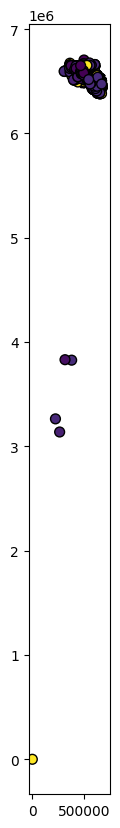

In [9]:
fig, ax = plt.subplots(figsize=(8, 10))
belgium.plot(ax=ax, color="lightgrey", edgecolor = "black")

gdf.plot(column='incident_type', cmap='viridis', markersize=50, ax=ax, edgecolor="k")
plt.show()

In [10]:
filtered_gdf = gdf[gdf.approx_lat>45]
outside_belgium_tuples = gdf[gdf.approx_lat<=45]

What shall we do with the points that are definetely not in Belgium?

We assume there was an error in the latitude, longitude sensor and that those are still valuable tuples we should keep in our dataset

In [11]:
outside_belgium_tuples

,incident_id,vehicles_sequence,events_sequence,seconds_to_incident_sequence,approx_lat,approx_lon,train_kph_sequence,dj_ac_state_sequence,dj_dc_state_sequence,incident_type,geometry
244,4444499,"[598, 595, 595, 598, 595, 598, 595, 598, 598, ...","[690, 4396, 690, 4396, 2564, 2564, 2534, 2534,...","[-12870, -12869, -12869, -12869, -12867, -1286...",32.479336,3.387316,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, False, Fa...",14,POINT (377074.258 3826396.67)
834,4601501,"[707, 707, 707, 707, 707, 707, 707, 707, 707, ...","[4190, 194, 4190, 194, 2934, 2320, 4394, 1566,...","[-14221, -14221, -14159, -14159, -8254, -8253,...",32.513107,2.816853,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",6,POINT (313570.683 3830853.961)
877,4603819,"[593, 639, 593, 612, 612, 639, 639, 593, 612, ...","[4026, 4026, 4016, 2742, 4026, 4016, 4026, 402...","[-11407, -11407, -11406, -11406, -11406, -1140...",28.115668,1.992864,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",13,POINT (221844.551 3263564.713)
901,4605347,"[612, 612, 612, 612, 612, 612, 612, 612, 612, ...","[4394, 152, 4394, 152, 4394, 152, 4394, 152, 4...","[-13733, -13733, -12880, -12880, -12012, -1201...",0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",99,POINT (0 0)
914,4606483,"[502, 502, 502, 502, 502, 502, 502, 502, 502, ...","[4124, 3636, 3658, 4184, 2956, 2956, 4184, 295...","[-14371, -14370, -14370, -14349, -14310, -1430...",27.113984,2.353641,"[0.0, 0.0, 0.0, 0.0, 22.4, 29.5, 41.3, 45.1, 4...","[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",11,POINT (262006.132 3137719.805)


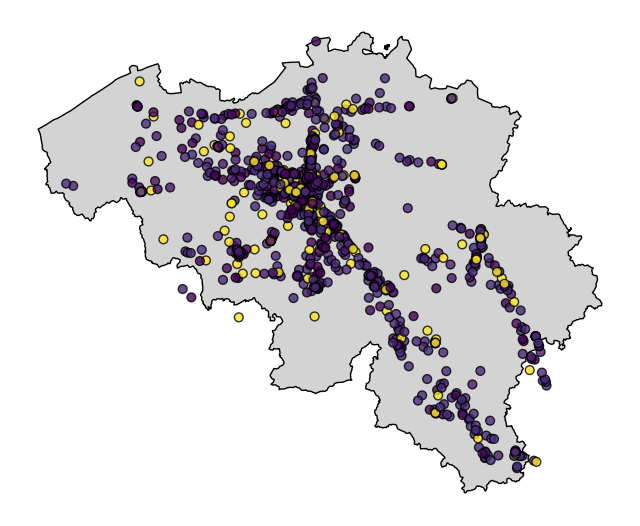

In [13]:
fig, ax = plt.subplots(figsize=(8, 10))
belgium.plot(ax=ax, color="lightgrey", edgecolor = "black")
filtered_gdf.plot(column='incident_type', cmap='viridis', markersize=40, ax=ax, alpha=0.8, edgecolor="k")
plt.axis('off')
plt.show()

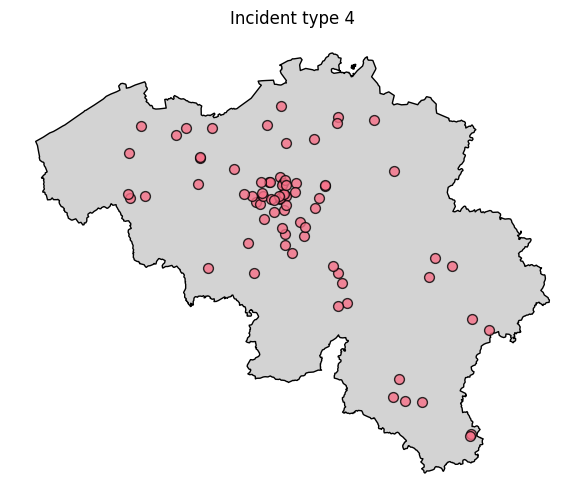

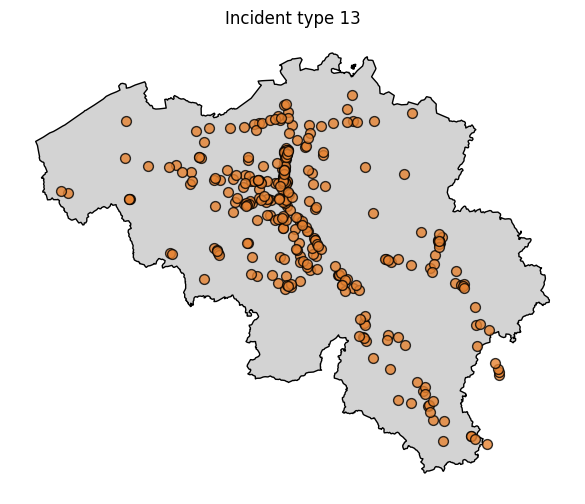

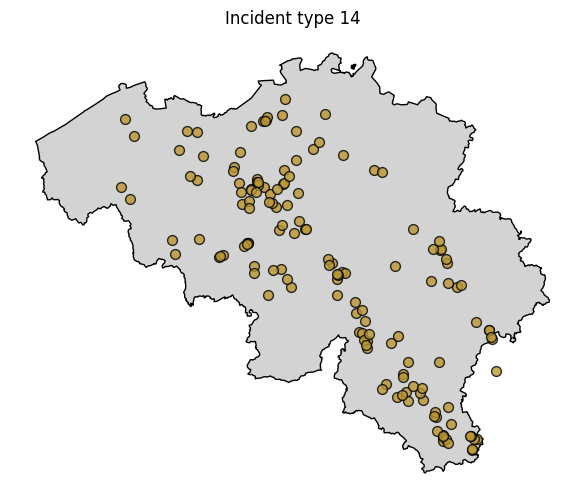

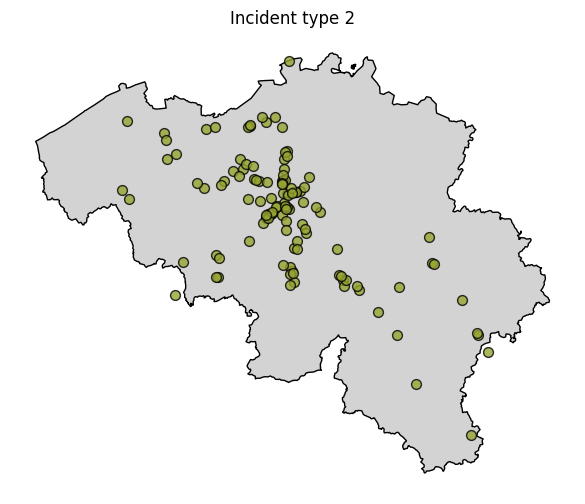

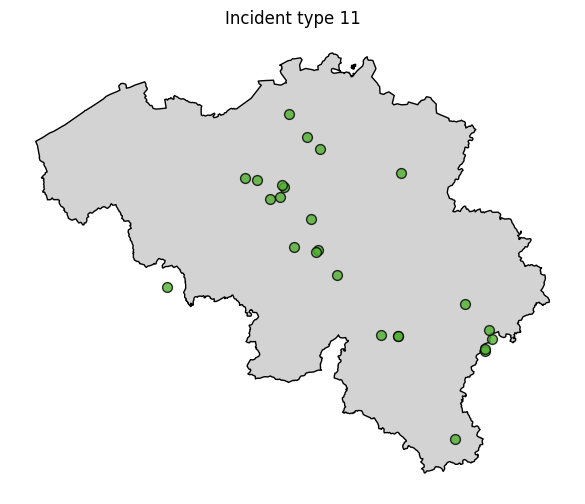

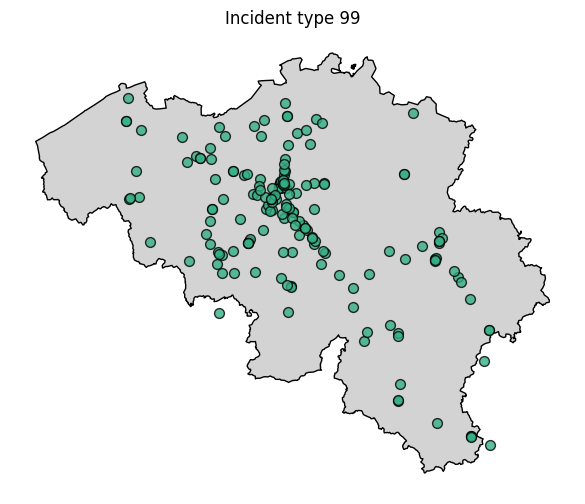

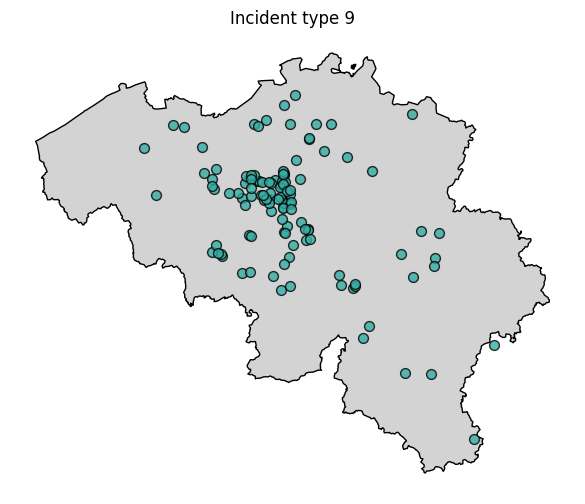

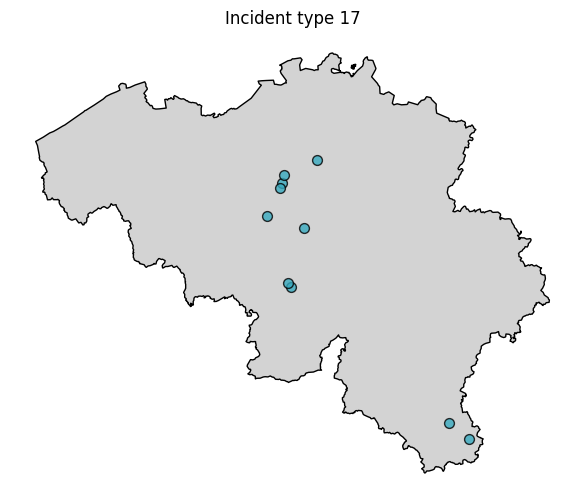

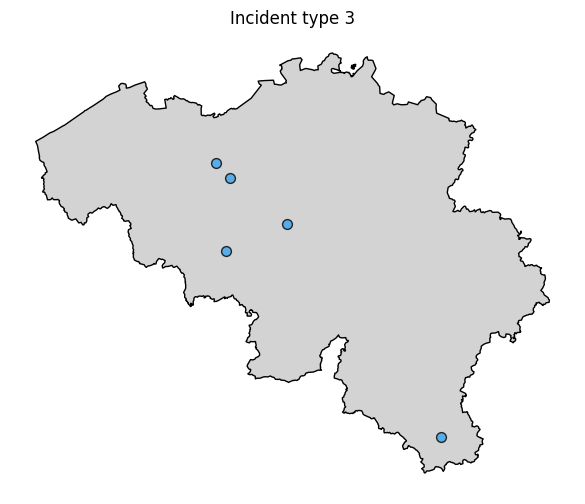

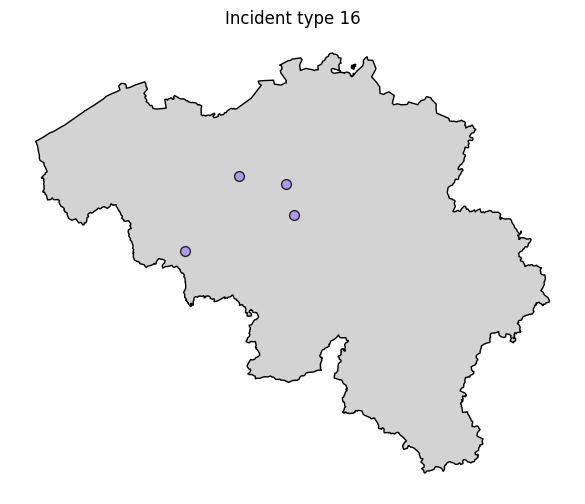

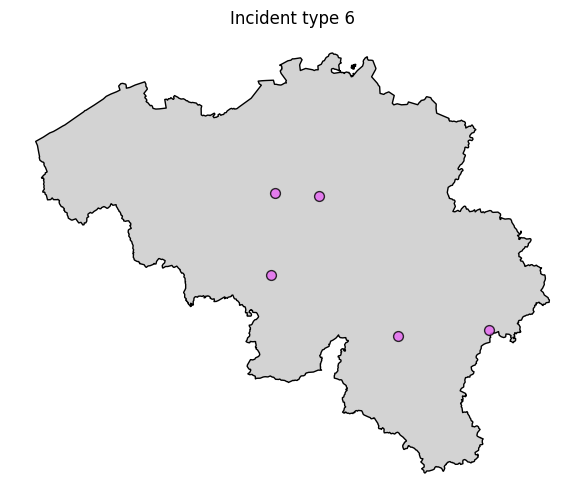

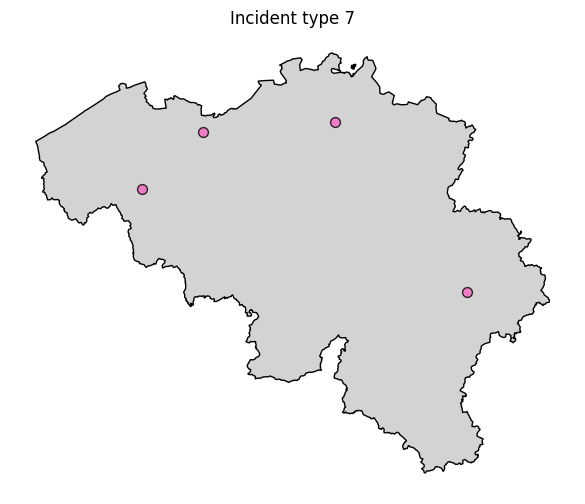

In [93]:
incidents = gdf.incident_type.unique()
colors = sns.color_palette("husl", len(incidents))
filtered_gdf = gdf[gdf.approx_lat>45]

for i, incident in enumerate(incidents):
    fig, ax = plt.subplots(figsize=(8, 6))
    belgium.plot(ax=ax, color="lightgrey", edgecolor = "black")
    subset = filtered_gdf[filtered_gdf.incident_type == incident]
    subset.plot(color=colors[i], markersize=50, edgecolor='k', alpha=0.8, ax=ax)
    plt.axis('off')
    plt.title(f"Incident type {incident}")
    plt.show()